In [2]:
# Standard useful data processing imports
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
model=load_model('cnn_model-10-epochs.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


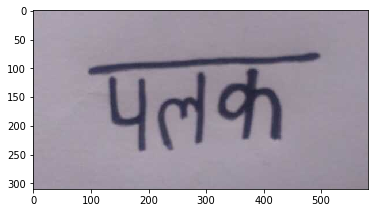

In [3]:
# image reading
img = mpimg.imread(r'D:\Harsh\Minor\palak3.jpeg')
plt.imshow(img)

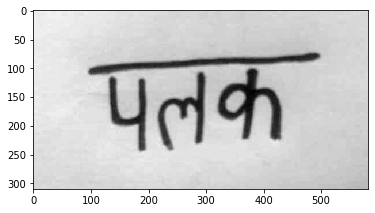

In [4]:
#Converting to GrayScale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

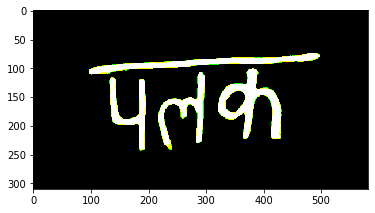

In [5]:
#converting to binarized image
ret, thresh_img = cv2.threshold(img, 100,255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh_img, cmap='gray')

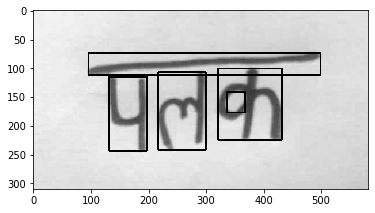

In [10]:
# Segmenting the grayscale word to bounding box
h, w = img.shape[:2]
image_size = h*w
mser = cv2.MSER_create()
mser.setMaxArea(int(image_size/2))
mser.setMinArea(10)

gray_copy = np.copy(gray)

regions, rects = mser.detectRegions(bw)
for (x, y, w, h) in rects:
    cv2.rectangle(gray_copy, (x, y), (x+w, y+h), color=(0, 0, 255), thickness=2)
#plot of the image
plt.imshow(gray_copy, cmap='gray')

IndexError: list index out of range

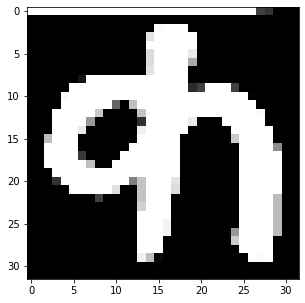

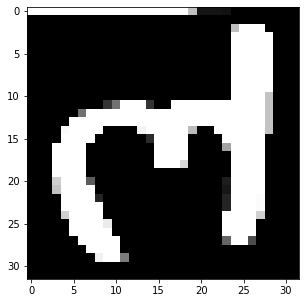

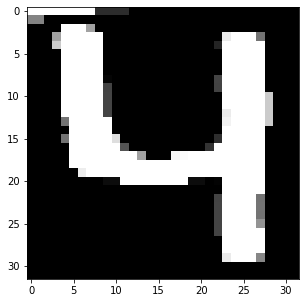

<Figure size 360x360 with 0 Axes>

In [12]:
# visualization of each bounded characters
images = []
for i in range(len(rects)):
    if rects[i][3] >= 50 and rects[i][2] >= 50:
        crop_img1 = gray[rects[i][1]-10:rects[i][1]+rects[i][3]+10, rects[i][0]-10:rects[i][0]+rects[i][2]+10]
        ret, thresh_img = cv2.threshold(crop_img1, 127, 255, cv2.THRESH_BINARY_INV)
        crop_img = cv2.resize(thresh_img, (32,32))
        images.append(crop_img)

for i in range(len(rects)):
    
    plt.figure(figsize=(5,5))
    plt.imshow(images[i], cmap='gray')

In [13]:
# post processing of the segmented characters
images_copy = np.asarray(images, np.float)
images_copy = images_copy.reshape(len(images_copy), 32, 32, 1)
images_copy /= 255
pred=model.predict(images_copy)
import pandas as pd
pred_dataframe = pd.DataFrame(pred)

In [14]:
pred_dataframe.idxmax(axis = 1)

0     0
1    27
2    20
dtype: int64

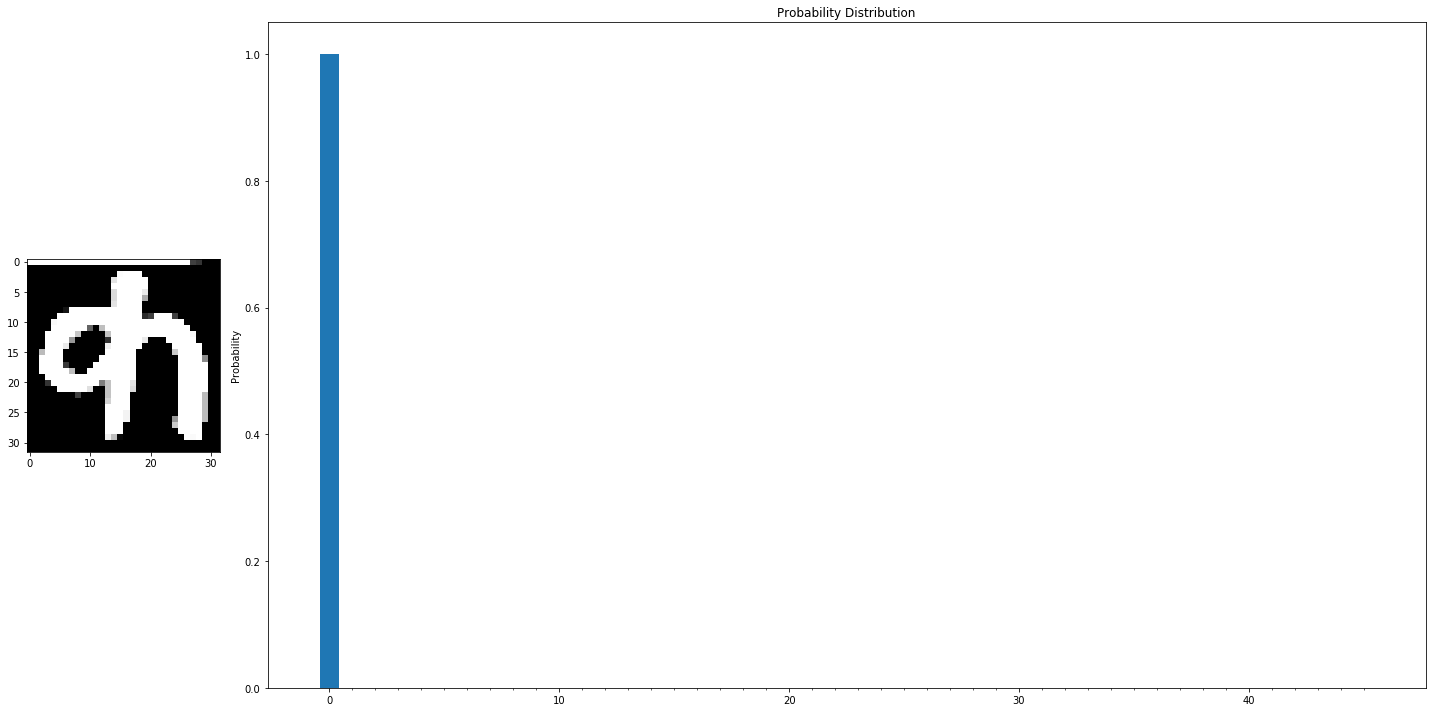

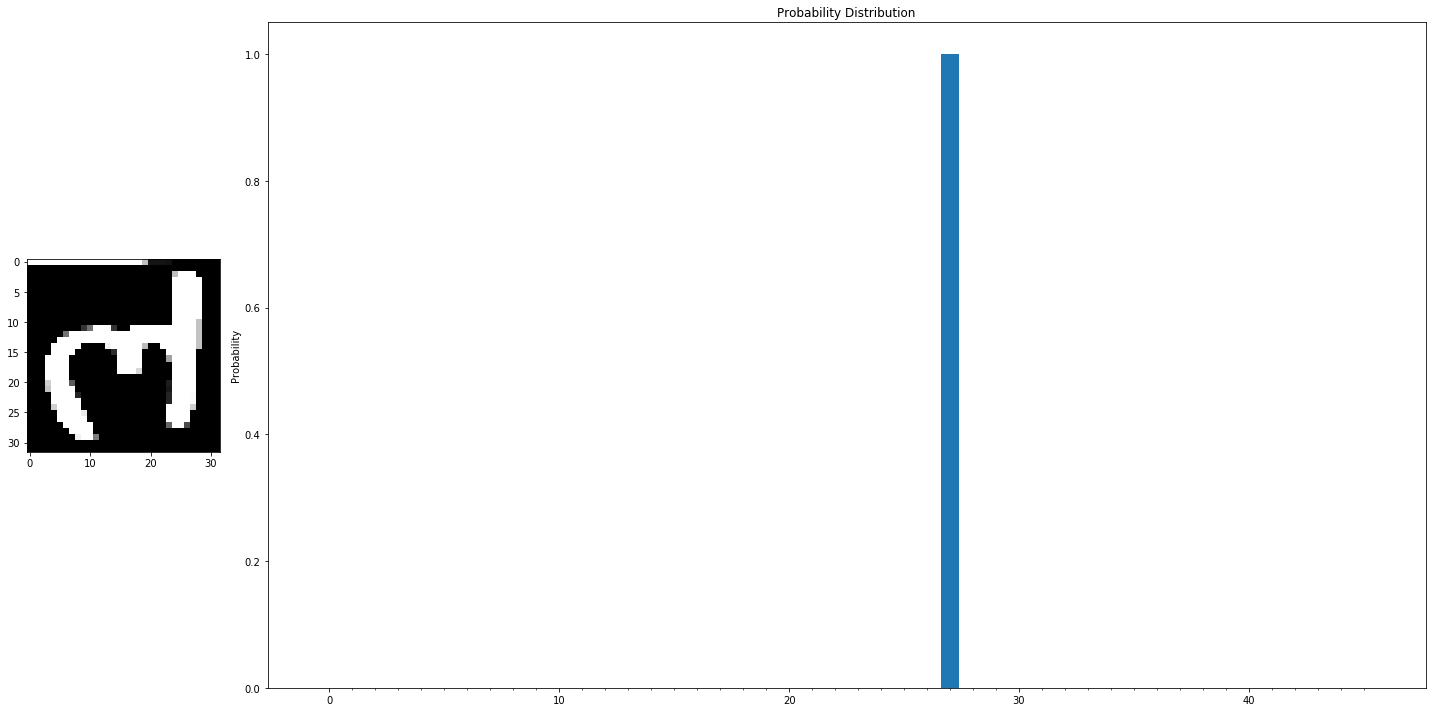

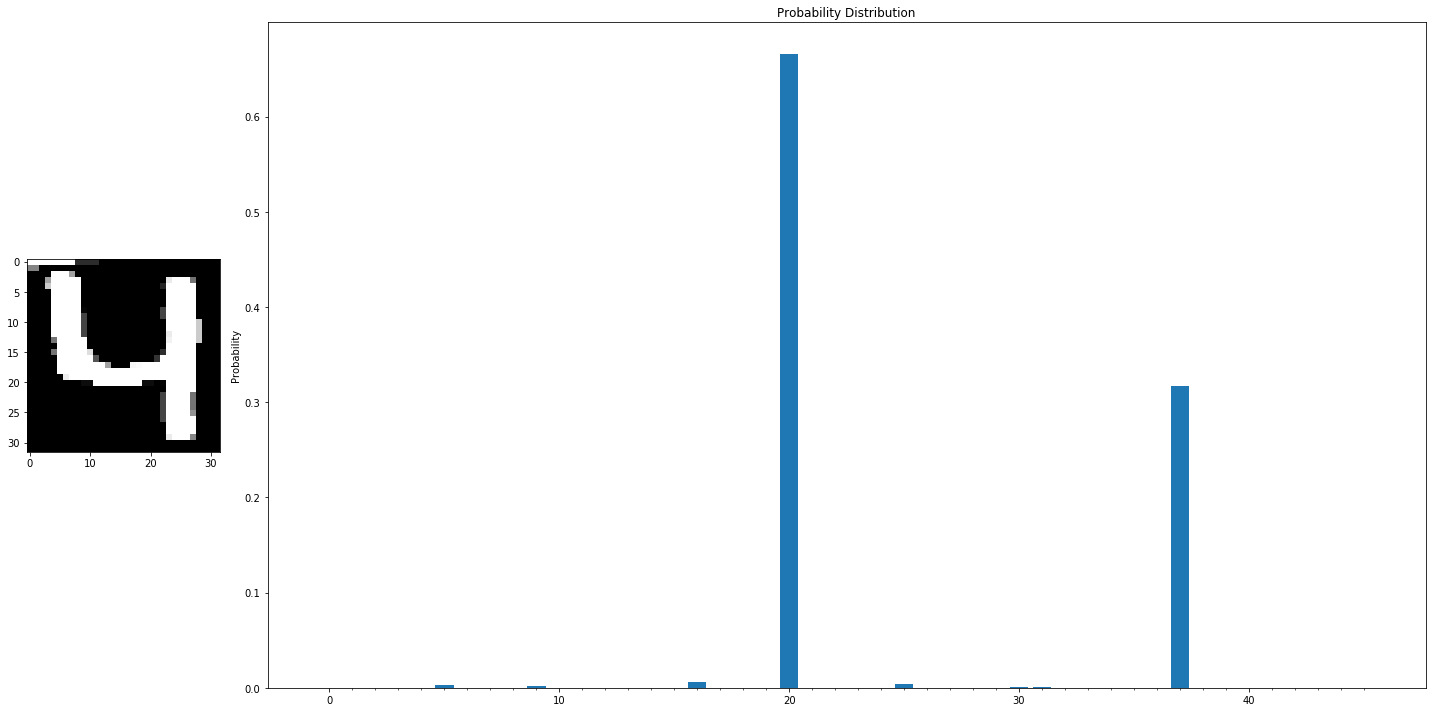

In [7]:
#plot for probability distribution of each characters
from matplotlib import gridspec
y_pos = np.arange(len(pred[0]))
xtick = [str(i) for i in range(len(pred[0]))]

for i in range(len(images)):
    fig = plt.figure(figsize=(20, 10)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[0.5, 3]) 
    ax0 = plt.subplot(gs[0])
    ax0.imshow(images[i], cmap='gray')
    ax1 = plt.subplot(gs[1])
    ax1.bar(y_pos, pred[i], align='center', alpha=1)
    ax1.set_xticks(y_pos, xtick)
    ax1.set_ylabel('Probability')
    ax1.set_title('Probability Distribution')
    plt.tight_layout()
    plt.show()